# Twitter Sentiment Analysis - Apple vs Google

## 1. Introduction and Overview (to update)
### Executive summary

Summary elements:

1. Business and data understanding: what kind of data are you using, and what makes it well-suited for the business problem?
 - You do not need to include any data visualizations in your summary, but consider including relevant descriptive statistics
2. Data preparation: why did you choose the data preparation steps that you did, and what was the result?
 - This should be specific to the kind of data you are working with. For example, if you are doing an NLP project, what did you decide to do with stopwords?
 - Be sure to list the packages/libraries used to prepare the data, and why
3. Modeling: what modeling package(s) did you use, which model(s) within the package(s), and what tuning steps did you take?
 - For some projects there may be only one applicable package; you should still briefly explain why this was the appropriate choice
4. Evaluation: how well did your final model perform?
 - Include one or more relevant metrics
 - Be sure to briefly describe your validation approach

## 2. Business Understanding
### 2.1 Business Problem

Apple and Google companies are interested in understanding public sentiment from Twitter to provide insights into customer satisfaction, product perception, and areas needing improvement. This information can help guide marketing strategies, customer support priorities, and product development decisions for better brand engagement and customer experience. Key stakeholders in this project are:
 - **Marketing Teams:** They would benefit from insights on public sentiment to create targeted marketing campaigns, enhance brand perception, and better understand customer preferences for Apple and Google products.
 - **Product Development Teams:** They need feedback on specific products to make informed decisions regarding feature enhancements, new product features, and overall product improvements.
 - **Customer Service Teams:** They could use sentiment analysis to proactively address negative sentiments, prioritize customer issues, and improve the overall customer experience by responding to customer feedback more effectively.

### 2.2 Objectives

- Develop an accurate model that can classify tweets into positive, negative, or neutral sentiments. This will enable the stakeholders to gauge customer sentiment quickly and efficiently on a large scale.
- Provide insights into the sentiment distribution for each product category. This would help marketing and product development teams understand how individual products are perceived and which ones might require attention or promotion.
- Identify patterns or trends in sentiment that may indicate areas for improvement or strengths in Apple and Google products. These insights can guide proactive customer service responses and highlight potential product issues before they escalate.

### 3. Data Understanding
This section will explore the data to become familiar with its characteristics as well as identify data quality issues and gather initial insights to guide further analysis.

In [1]:
#importing the necessary libraries
# Data manipulation
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# nltk
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Loading and previewing the twitter sentiments dataset
df = pd.read_csv(r'\Users\user\Desktop\DS_Projects\phase_4_project\twitter-sentiment-analysis\data\judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Exploring the data to gain insights about the data.

In [3]:
# Previewing the top of the dataset
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
# Previewing the bottom of the dataset
df.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [5]:
# Checking the dimensions of the data
df.shape

(9093, 3)

This output shows:

 - Number of Rows (Observations): There are 9093 rows in the DataFrame.
 - Number of Columns (Variables): There are 3 columns (or variables) in the DataFrame.

In [6]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [7]:
#Checking columns
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [8]:
#Checking unique values
emotion_counts = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
emotion_counts

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [9]:
#Checking unique values
product_counts = df['emotion_in_tweet_is_directed_at'].value_counts()
product_counts

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

From the output these are the columns in our data and their descriptions based on a review of our data and information from our data source:

 - **tweet_text:** Contains the text of each Tweet.
 - **emotion_in_tweet_is_directed_at:** Specifies the product or brand the emotion is directed at; *iPad, Apple, iPad or iPhone App, Google, iPhone, Other Google product or service, Android App, Android, Other Apple product or service.*
 - **is_there_an_emotion_directed_at_a_brand_or_product:** Indicates the sentiment associated with the Tweet; *No emotion toward brand or product, Positive emotion, Negative emotion, I can't tell.*

## 4. Data Preparation

Here I will clean and preprocess the data, including selecting relevant features, handling missing values, and transforming data into the desired format for modeling

### 4.1 Exploratory Data Analysis
#### Check for any missing values

In [10]:
# Checking for missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

From the output we can conclude that:
 - Only **1** row is missing in the `tweet_text` column, and **5,802** rows have missing values in `emotion_in_tweet_is_directed_at`.
 - The missing values from `emotion_in_tweet_is_directed_at` are quite significant being more than half of the observation meaning these might/will impact sentiment classification. To deal with these rather than dropping the rows they'll instead be filled in with the *'NaN'* value.
 - The missing value from `tweet_text` is not significant meaning these will not impact sentiment classification therefore the row can be dropped.

#### Check for any duplicate values

In [11]:
# Checking for duplicates
df.duplicated().sum()

22

From the output there are **22** duplicate values within this dataset. Duplicate rows will be dropped from the dataset.

### 4.2 Data Cleaning
#### 4.2.1 Filling in the missing values in the `emotion_in_tweet_is_directed_at` column

In [12]:
# Replace missing values in 'emotion_in_tweet_is_directed_at' column with 'NaN'
df['emotion_in_tweet_is_directed_at'].fillna('NaN', inplace=True)

# Confirm replacement of missing values
missing_values_after_replacement = df.isnull().sum()
missing_values_after_replacement

tweet_text                                            1
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

#### 4.2.2 Dropping the missing value in the `tweet_text` column

In [13]:
# Drop row with missing value in 'tweet_text' column
df = df.dropna(subset=['tweet_text'])

In [14]:
# Confirm that there are no more missing values in the dataset
missing_values_final = df.isnull().sum()
missing_values_final

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

From the output there are no more missing or duplicate values within the dataset.

#### 4.2.3 Dropping the duplicate values

In [15]:
# Remove duplicates
df = df.drop_duplicates()

# Display the cleaned dataset information to confirm the changes
df.duplicated().sum()

0

### 4.3 Column Renaming

In [16]:
# Renaming columns to shorter names
df = df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'
})

# Previewing the top of the dataset
df.head()

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### 4.4 Data Visualization
#### 4.4.1 Emotion Distribution

In [17]:
emotion_counts = df['emotion'].value_counts()

emotion_counts.head()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: emotion, dtype: int64

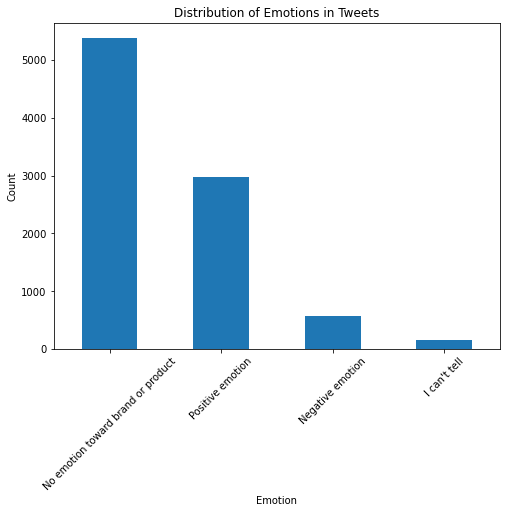

In [18]:
import matplotlib.pyplot as plt

# Plot the distribution of emotions
emotion_counts = df['emotion'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
emotion_counts.plot(kind='bar')
plt.title('Distribution of Emotions in Tweets')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The bar plot shows the distribution of emotions in the tweets. This visualization provides an overview of the sentiment balance within the dataset.For a cleaner visualization;
 - The `No emotion toward brand or product` column name will be replaced with `Neutral emotion`.
 - The `I can't tell` column will then be dropped since it does not contribute to the sentiment analysis.

In [19]:
# Replace 'No emotion toward brand or product' with 'Neutral emotion'
df['emotion'] = df['emotion'].replace(
    'No emotion toward brand or product', 'Neutral emotion'
)

# Drop rows with 'I can't tell' in 'emotion' column
df = df[df['emotion'] != "I can't tell"]

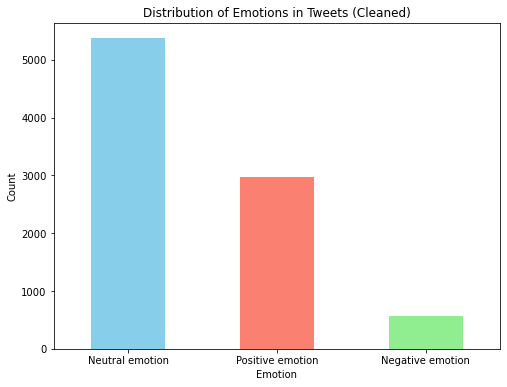

In [20]:
# Re-plot with horizontal labels and different bar colors
emotion_counts_cleaned = df['emotion'].value_counts()

plt.figure(figsize=(8, 6))
emotion_counts_cleaned.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Emotions in Tweets (Cleaned)')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate labels horizontally

plt.show()

Above is the updated bar plot showing the distribution of emotions after renaming `No emotion toward brand or product` to `Neutral emotion` and dropping the `I can't tell` category. This should provide a clearer view of the sentiment distribution relevant to the analysis.

**Observation**
- The emotion distribution plot reveals a higher proportion of **Positive** emotions compared to **Negative** emotions. This suggests that, in general, users tend to express positive sentiments when discussing Apple and Google products on Twitter.
- **Neutral** emotions are also quite prevalent, indicating that a significant portion of users simply mention these products without conveying a strong sentiment.
- The presence of Negative emotions, although smaller, is notable and could be important for identifying areas of customer dissatisfaction.

This insight can guide the sentiment analysis approach. For example, if Positive and Negative sentiments are key for business insights, we might place greater focus on ensuring accurate classification between these two categories.

#### 4.4.2 Product Distribution

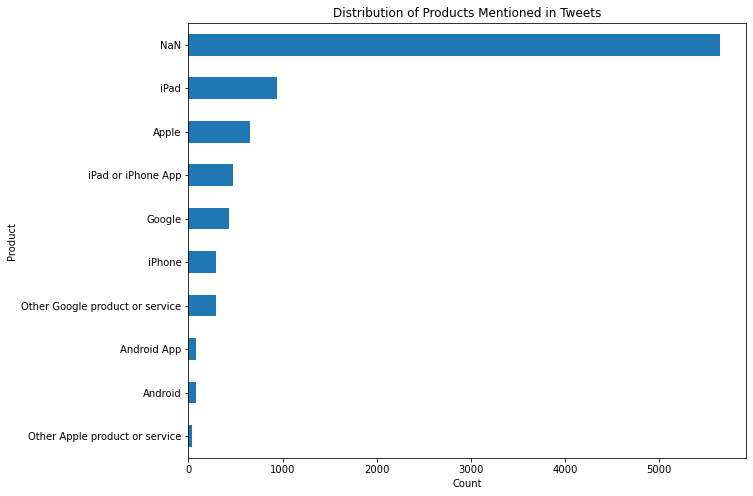

In [21]:
# Plot the distribution of products
product_counts = df['product'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 8))
product_counts.sort_values().plot(kind='barh')
plt.title('Distribution of Products Mentioned in Tweets')
plt.xlabel('Count')
plt.ylabel('Product')

plt.show()

**Observation**
- The product distribution plot shows which specific products or categories are mentioned most frequently by users.
- Specific products (e.g., **iPhone**, **iPad**, etc.) are dominant, it indicates these are the products people are most engaged with.
- This distribution helps in targeting the sentiment analysis; knowing which products are frequently mentioned can help in customizing marketing or support efforts. Products with fewer mentions might be areas where the company could increase visibility or engagement.

### 4.5 Text Preprocessing
Text preprocessing is an essential step in natural language processing (NLP) that involves cleaning and transforming unstructured text data to prepare it for analysis. It includes tokenization, stemming, lemmatization, stop-word removal, and part-of-speech tagging

1. Text Cleaning
 - Remove URLs, special characters, and emojis to ensure that only meaningful text remains.
2. Tokenization and Stopword Removal
 - Tokenize the tweets into individual words.
 - Remove common stopwords to focus on significant terms.
3. Lemmatization
 - Reduce words to their base forms to standardize the vocabulary.

##### Cleaning the `tweet_text` column

In [22]:
# Re-import required libraries for text preprocessing and update the function as provided
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the optimized text cleaning and preprocessing function
def clean_tweets(tweet_series):
    # Handle non-string entries and convert to strings
    def convert_to_string(x):
        if pd.isna(x):  # Handle NaN values
            return ""
        return str(x)   # Convert everything else to string
    
    tweets_strings = tweet_series.apply(convert_to_string)
    
    # Convert to lowercase and remove URLs, mentions, hashtags, punctuation, numbers, and extra whitespace
    tweets_lower = tweets_strings.str.lower()
    tweets_no_urls = tweets_lower.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))
    tweets_no_mentions = tweets_no_urls.apply(lambda x: re.sub(r'@\w+', '', x))
    tweets_no_hashtags = tweets_no_mentions.apply(lambda x: re.sub(r'#\w+', '', x))
    tweets_no_punct = tweets_no_hashtags.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    tweets_no_numbers = tweets_no_punct.apply(lambda x: re.sub(r'\d+', '', x))
    tweets_clean = tweets_no_numbers.apply(lambda x: ' '.join(x.split()))
    
    # Tokenization
    tweets_tokenized = tweets_clean.apply(lambda x: word_tokenize(x) if x.strip() else [])
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tweets_no_stopwords = tweets_tokenized.apply(lambda x: [word for word in x if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweets_lemmatized = tweets_no_stopwords.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # Concatenate tokens back into sentences
    tweets_final = tweets_lemmatized.apply(lambda x: ' '.join(x))
    
    return tweets_final

# Apply the updated function to preprocess the tweet data
df['cleaned_tweet'] = clean_tweets(df['tweet'])

# Display the first few rows to confirm the cleaning process
df[['tweet', 'cleaned_tweet']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet,cleaned_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...


The tweets have been successfully cleaned and preprocessed using the optimized function. The resulting `cleaned_tweet` column now contains text that is lowercased, with URLs, mentions, hashtags, punctuation, and numbers removed. Additionally, stopwords have been removed, and words have been lemmatized.

## 5. Modeling

To start the modeling phase, I'll first prepare the data for a binary classification task (positive vs. negative), as per the plan to build a simple model first. Here are the steps:

 - **Label Encoding:** Convert the sentiment labels to numerical values for binary classification.
 - **Vectorization:** Use TF-IDF(Term Frequency Inverse Document Frequency) to convert the text data into numerical features.
 - **Train-Test Split:** Split the data into training and testing sets.
 - **Modeling:** Train a baseline model (e.g., Logistic Regression) to classify tweets as positive or negative.

### 5.1 Encoding sentiment labels

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Label Encoding: Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['emotion'])

# Display the mapping of labels to numbers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'Negative emotion': 0, 'Neutral emotion': 1, 'Positive emotion': 2}

The sentiment labels have been encoded as follows:

 - **Negative emotion: 0**
 - **Neutral emotion: 1**
 - **Positive emotion: 2**

### 5.2 Vectorization

In [24]:
# Vectorization: Convert the text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features for simplicity
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])

# Display the shape of the resulting TF-IDF matrix
X.shape

(8914, 5000)

The TF-IDF vectorization has transformed the text data into a matrix with dimensions (8914, 5000), where **8,914** is the number of tweets and **5,000** represents the selected top features. The data is now ready for building the classification model.

### 5.3 Test-Train Split

In [25]:
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])
y = df['emotion_encoded']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm successful split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6239, 5000), (2675, 5000), (6239,), (2675,))

### The data has been prepared for binary classification:

 - **Training set:** 6,239 samples.
 - **Testing set:** 2,675 samples.
 - **Features:** TF-IDF vectorized to 5,000 top words.

### Model 1: Decision Tree Model - Baseline

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Fit a Decision Tree model as the baseline model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display the results
print("Decision Tree Classifier - Baseline Model")
print("========================================")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Decision Tree Classifier - Baseline Model
Accuracy: 0.63

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.37      0.24      0.29       190
 Neutral emotion       0.70      0.75      0.72      1596
Positive emotion       0.53      0.50      0.52       889

        accuracy                           0.63      2675
       macro avg       0.53      0.50      0.51      2675
    weighted avg       0.62      0.63      0.62      2675



#### Output Analysis
**Accuracy: 63%**
The model correctly classified 63% of tweets, indicating moderate performance as a baseline.

**Classification Report Breakdown:**

**1. Negative Emotion:**
  - Precision (37%): Out of all tweets the model predicted as negative, only 37% were actually negative. This low precision indicates a tendency to incorrectly classify other sentiments as negative.
  - Recall (24%): Out of all true negative tweets, only 24% were correctly identified as such. This indicates that the model missed a significant portion of actual negative tweets.
  - F1-Score (29%): The combined score of precision and recall is low, suggesting that the model struggles to detect negative sentiments accurately.

**2. Neutral Emotion:**
 - Precision (70%): The model is quite accurate in predicting neutral tweets. Out of all predicted neutral tweets, 70% were correct.
 - Recall (75%): The model successfully identified 75% of all actual neutral tweets, showing a strong ability to detect this class.
 - F1-Score (72%): This is the highest among the three sentiments, indicating the model’s stronger performance in detecting neutral emotions.

**3. Positive Emotion:**
 - Precision (53%): Out of all predicted positive tweets, 53% were accurate, which is moderate but could be improved.
 - Recall (50%): The model identified half of the true positive tweets, suggesting some difficulty in detecting positive sentiment.
 - F1-Score (52%): Similar to precision and recall, the F1-score is moderate, indicating room for improvement.

**Summary:**
- The Neutral emotion category has the highest precision, recall, and F1-score, suggesting that the model is more effective at detecting neutral sentiment.
- Negative emotions are particularly challenging for the model, with the lowest scores in precision, recall, and F1, indicating that the baseline model might benefit from further optimization, such as hyperparameter tuning or a more complex model.
- The macro average F1-score of 51% indicates that performance across categories is relatively balanced but highlights the need for improvement, especially for negative sentiment detection.

### Model 2 - Decision Tree Model (with Hyperparameter Tuning)
Here I want to improve the Decision Tree model's ability to generalize by tuning its hyperparameters to reduce overfitting and enhance its predictive performance.

The set up of the hyperparameter tuning will be done using GridSearchCV.

In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = { 
    'max_depth': [5, 10, None],  
    'min_samples_split': [2, 10], 
    'min_samples_leaf': [1, 5], 
    'criterion': ['gini'], 
    'class_weight': ['balanced'] 
}

# Initialize and run GridSearchCV
decision_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output best parameters and best accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Fit the model with the best parameters to the training data
best_decision_tree = grid_search.best_estimator_
best_decision_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nTuned Decision Tree Classifier")
print("========================================")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.5823043252524007

Tuned Decision Tree Classifier
Accuracy: 0.59

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.31      0.36      0.33       190
 Neutral emotion       0.70      0.67      0.68      1596
Positive emotion       0.48      0.50      0.49       889

        accuracy                           0.59      2675
       macro avg       0.50      0.51      0.50      2675
    weighted avg       0.60      0.59      0.59      2675



**Output Analysis**

**Overall Accuracy:**
- Baseline Accuracy: 63%
- Tuned Model Accuracy: 59%
The tuned model’s accuracy is slightly lower than the baseline. Despite hyperparameter adjustments, the overall accuracy dropped, indicating that the baseline model may have already captured the optimal complexity for this dataset using default settings.

**Classification Report Breakdown:**

**1. Negative Emotion:**
 - Baseline: Precision (30%), Recall (18%), F1-Score (23%)
 - Tuned: Precision (31%), Recall (36%), F1-Score (33%)

Analysis: The tuned model shows improvement in both recall and F1-score for negative emotions, indicating better detection of negative tweets. Precision remains almost the same, suggesting that the tuned model is more capable of identifying true negatives, but still has room for reducing false positives.

**2. Neutral Emotion:**
 - Baseline: Precision (71%), Recall (75%), F1-Score (73%)
 - Tuned: Precision (70%), Recall (67%), F1-Score (68%)

Analysis: There is a slight decrease in performance for neutral emotions. Precision and recall both dropped slightly, which contributed to a lower F1-score. The tuning might have introduced some instability for this class, suggesting that the balanced class weights or unrestricted depth might have led to overfitting or misclassification between Neutral and other classes.

**3. Positive Emotion:**
 - Baseline: Precision (50%), Recall (49%), F1-Score (49%)
 - Tuned: Precision (48%), Recall (50%), F1-Score (49%)

Analysis: Performance for positive emotions remains almost unchanged. The F1-score is stable, but with a slight drop in precision, indicating similar behavior to the baseline model. This stabilization suggests that the tuning did not significantly impact the model’s ability to distinguish positive tweets.

**Summary:**
- Improvements: The primary improvement is observed in the Negative Emotion category, where both recall and F1-score increased, reflecting a better ability to capture negative sentiments.
- Stabilization: For Positive Emotions, performance is largely unchanged, indicating that tuning did not provide significant gains or losses.
- Drops: Performance slightly decreased for Neutral Emotions, with drops in precision, recall, and F1-score, suggesting some instability likely due to the added complexity from unrestricted depth and balanced class weights.

### Model 3: XGBoost Classifier
The tuned Decision Tree model offered minor improvements in detecting negative emotions but does not provide overall gains in accuracy or stability across all classes. In this section, XGBoost will be explored as an alternative models to check for the ability to achieve a better balance across all sentiment categories.

In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize an XGBoost Classifier without deprecated parameters
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', objective='multi:softmax', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_)

# Display the results
print("XGBoost Classifier")
print("========================================")
print(f"Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report:")
print(report_xgb)

XGBoost Classifier
Accuracy: 0.67

Classification Report:
                  precision    recall  f1-score   support

Negative emotion       0.53      0.17      0.26       190
 Neutral emotion       0.69      0.88      0.77      1596
Positive emotion       0.64      0.41      0.50       889

        accuracy                           0.67      2675
       macro avg       0.62      0.49      0.51      2675
    weighted avg       0.66      0.67      0.65      2675



**Output analysis**

**Accuracy: 67%** indicates that XGBoost outperforms the Decision Tree models, suggesting better generalization.

**Classification Report:**
 - **Negative Emotion:** The recall for negative sentiment is still low, suggesting challenges in identifying negative tweets.
 - **Neutral Emotion:** Strong performance with 88% recall and 77% F1-score, showing the model’s ability to detect neutral tweets.
 - **Positive Emotion:** Balanced precision and recall but could benefit from further tuning.

XGBoost performed better overall but may benefit from additional tuning to further improve results, especially for negative sentiment.

## 6. Evaluation
### 6.1 Overall Comparison and Recommendation

**1. Baseline Model (Decision Tree without Tuning):**

Strengths:
 - Simple and interpretable, providing initial insights into tweet sentiment.
 - Performed moderately well for neutral sentiment, achieving a precision of 71% and recall of 75%.

Weaknesses:
 - Struggled with identifying negative sentiment, with a recall of only 18%. This is problematic as understanding negative sentiment is critical for addressing customer concerns.
 - Showed limited ability to accurately capture positive sentiment, with an F1-score of 49%.

**2. Tuned Decision Tree Model:**

Strengths:
 - Improved recall for negative sentiment, increasing from 18% to 36%, which helps in better identifying tweets with potential areas of concern.
 - Balanced precision and recall for neutral and positive sentiments, suggesting slightly more consistent performance across all classes.

Weaknesses:
 - Overall accuracy dropped slightly from 63% to 59%. The model also struggled to significantly improve in detecting positive sentiment, suggesting that Decision Trees may not be the best fit for this dataset.
 - Minor overfitting issues due to the unrestricted depth parameter, which likely impacted generalizability.

**3. XGBoost Model:**

Strengths:
 - Achieved the highest overall accuracy at 67%, indicating strong generalization and ability to distinguish between different sentiment classes.
 - Excellent recall for neutral sentiment at 88%, showing a high capacity to detect neutral tweets accurately, which can be beneficial for marketing and engagement strategies.
 - Balanced precision and recall for positive sentiment, with a notable F1-score of 50%, indicating that it captures positive feedback better than the other models.

Weaknesses:
 - Although improved, recall for negative sentiment (17%) remains low, suggesting that additional tuning or further data preprocessing might be needed to boost sensitivity for negative tweets.

**Best Model  for sentiment analysis:** The **XGBoost Model** is the most suitable choice for Apple and Google’s sentiment analysis objectives. Its higher accuracy and balanced performance make it better suited to provide insights into customer satisfaction, product perception, and areas needing improvement. While XGBoost still struggles with negative sentiment detection, it outperforms both Decision Tree models, particularly in terms of generalization and identifying neutral and positive sentiments.

This makes it a valuable tool for:

Customer Support: Quickly identifying and categorizing customer sentiments for more targeted responses.
Marketing Strategy: Understanding public perception to tailor marketing efforts and focus on promoting positive aspects while addressing neutral feedback.
Product Development: Although negative sentiment recall is low, XGBoost's overall performance ensures that it can reliably highlight areas where customer experiences are positive or neutral, aiding in decision-making for product improvements.